# --- Day 3: Spiral Memory ---

You come across an experimental new kind of memory stored on an infinite two-dimensional grid.

Each square on the grid is allocated in a spiral pattern starting at a location marked 1 and then counting up while spiraling outward. For example, the first few squares are allocated like this:

```
17  16  15  14  13
18   5   4   3  12
19   6   1   2  11
20   7   8   9  10
21  22  23---> ...
```

While this is very space-efficient (no squares are skipped), requested data must be carried back to square 1 (the location of the only access port for this memory system) by programs that can only move up, down, left, or right. They always take the shortest path: the Manhattan Distance between the location of the data and square 1.

For example:

Data from square 1 is carried 0 steps, since it's at the access port.
Data from square 12 is carried 3 steps, such as: down, left, left.
Data from square 23 is carried only 2 steps: up twice.
Data from square 1024 must be carried 31 steps.
How many steps are required to carry the data from the square identified in your puzzle input all the way to the access port?

Your puzzle input is `312051`.

First, I want to visualize how the data is stored. so the necessary imports:

In [163]:
# the viz stuff
%matplotlib inline
import matplotlib.pyplot as plt # mpl is the base of all python plotting angst
import seaborn as sns # put some trainer wheels & lipstick on mpl

# cause data
import numpy as np				# crunch them numbers

From eyeballing the data square, it makes sense to only deal with odd sized squares, so everytime we make the next size square we start with the bottom right corner:

In [154]:
def find_square_size(n):
    '''given a number n, requrn the side length of the odd square it fits in'''
    
    # get square root and round up
    num = int(np.ceil(np.sqrt(n))) 
    
    # make sure the square we're ruturning is a odd square
    while num % 2 == 0:
        num += 1        
    return num

[find_square_size(n) for n in [1,2,3,4,5,6,7,8,9,10,11,49]]

[1, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 7]

In [156]:
sq = 9
sq_length = find_square_size(sq)
mid = sq_length // 2

sq_nums = [num for num in range(1, sq+1)]
print("nums in square: ", sq_nums)

nums in square:  [1, 2, 3, 4, 5, 6, 7, 8, 9]


Now, lets get the range of x and y values:

In [157]:
x = np.arange(-mid, mid+1)
y = np.arange(-mid, mid+1)
x, y

(array([-1,  0,  1]), array([-1,  0,  1]))

This gives u the range of x and y for a given square, now to get the coordinate space:

In [158]:
xx, yy = np.meshgrid(x_vals, y_vals)
xx, yy

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]), array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]))

So we can eyeball this:

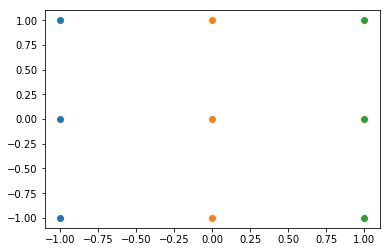

In [173]:
plt.plot(xx,yy, marker="o", linestyle="none");

So I have the coordinate space for a given square of numbers, now I need to arrange the numbers like:

```
17  16  15  14  13
18   5   4   3  12
19   6   1   2  11
20   7   8   9  10
21  22  23---> ...
```

In [174]:
p = np.zeros((sq_length, sq_length))
print(p)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [ ]:
def data_steps(n):
    '''returns the number of steps from data square n to the input port'''
    return n

data_steps(1)

In [ ]:
tests = [(1, 0), 
         (12, 3), 
         (23, 2), 
         (1024, 31), 
         ]
for data_square, steps in tests:
    assert data_steps(data_square) == steps

In [10]:
puzzle_input = 312051
data_steps(puzzle_input)

312051